In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#path: /content/gdrive/MyDrive/MLVLab/Lab1/Cohn-Kanade/neutral

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import cv2
import glob
import sys
import os
from os import listdir

## **Part 2**
## **2-1**

In [49]:
src = '/content/gdrive/MyDrive/MLVLab/Lab1/Cohn-Kanade/neutral'

data = dict()

for file in os.listdir(src):
  if file[-3:] in {'jpg', 'png'}:
    key = file[1:4]
    if key not in data.keys():
      data[key] = []
    im = io.imread(os.path.join(src,file), as_gray = True)
    N1 = im.shape[0]
    N2 = im.shape[1]
    im_row = np.reshape(im, N1*N2)
    data[key].append(im_row)

train_data_key: list = list(data.keys())
test_data_key = train_data_key[70:]
train_data_key = train_data_key[:70]


train_dataset = []

for key in train_data_key:
  for item in data[key]:
    train_dataset.append(item)

test_dataset = []

for key in test_data_key:
  for item in data[key]:
    test_dataset.append(item)


In [ ]:
train_dataset = np.array(train_dataset)
test_dataset = np.array(test_dataset)
print(np.shape(train_dataset))
print(np.shape(test_dataset))

(136, 180000)
(54, 180000)


## **2-2**

shape of pca.components =  (10, 180000)


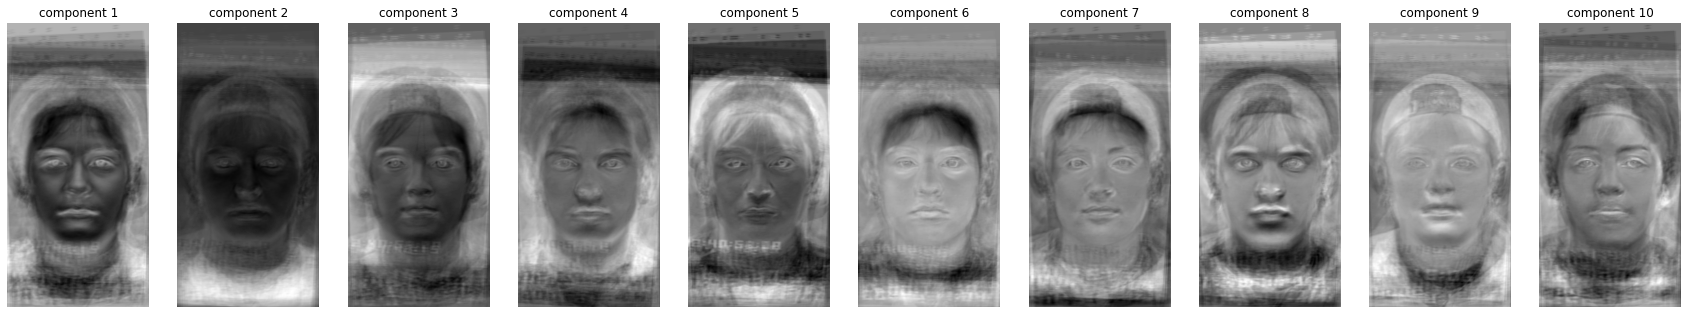

In [ ]:
from sklearn.decomposition import PCA

num_components = 10
pca = PCA(n_components = num_components)
pca.fit(train_dataset)

print('shape of pca.components = ', pca.components_.shape)

plt.figure(figsize=(30,10))  

for i in range(pca.components_.shape[0]):

    im = pca.components_[i]
    im = 255*((im - np.min(im)) / (np.max(im) - np.min(im)))
    im = im.reshape(N1,N2)
    plt.subplot(1, 10, i+1)
    plt.title('component '+ str(1+i))
    plt.imshow(im, cmap='gray')
    plt.axis('off')

## **2-3**

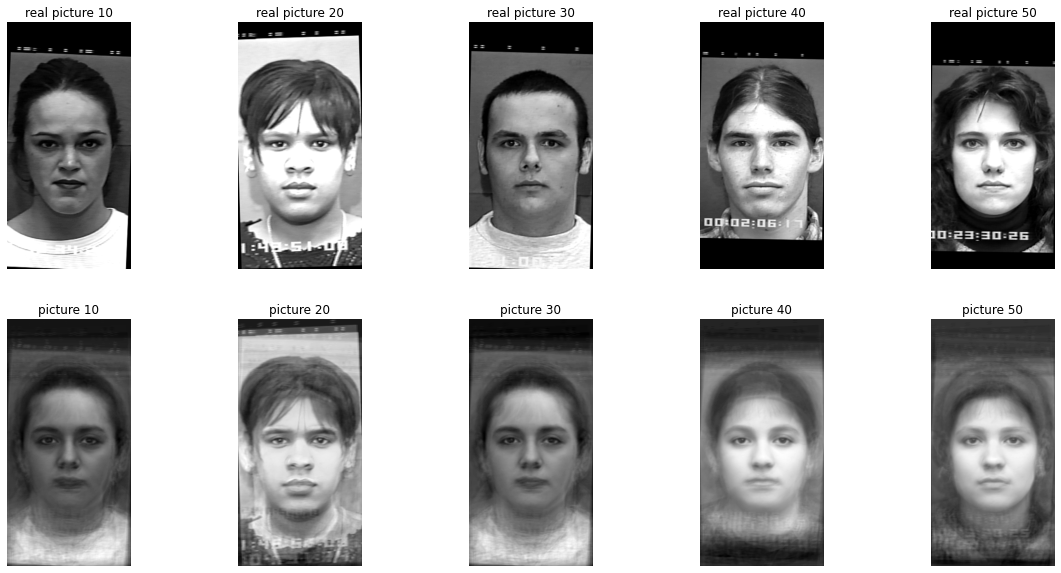

In [ ]:
X = pca.transform(train_dataset)   # Apply dimensionality reduction to X
Y = pca.inverse_transform(X)       # Transform data back to its original space

plt.figure(figsize=(20,10))   
for i in range(9,59,10):

  plt.subplot(2, 5, int(i/10)+1)
  plt.title('real picture '+str(1+i))
  #real_im = (train_dataset[i]+ mean).reshape(N1,N2)
  real_im = (train_dataset[i]).reshape(N1,N2)
  real_im = 255*((real_im - np.min(real_im)) / (np.max(real_im) - np.min(real_im)))
  plt.imshow(real_im, cmap='gray')
  plt.axis('off')

  #Y[i] = Y[i] + mean
  im = Y[i].reshape(N1,N2) 
  plt.subplot(2, 5, int(i/10)+6)
  plt.title('picture '+str(1+i))
  plt.imshow(im, cmap='gray')
  plt.axis('off')


shape of pca.components =  (20, 180000)


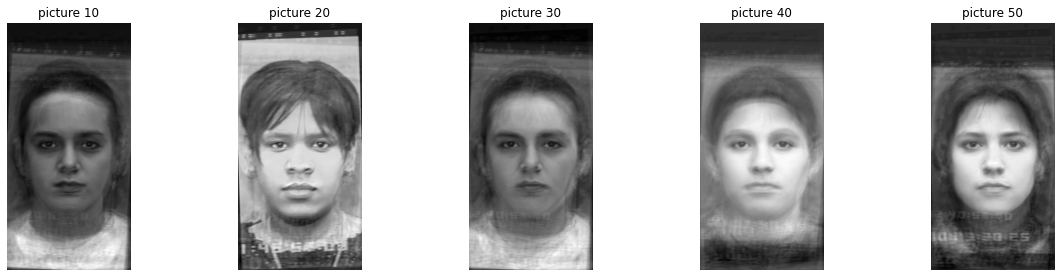

In [ ]:
num_components = 20
pca = PCA(n_components = num_components)
pca.fit(train_dataset)

print('shape of pca.components = ', pca.components_.shape)

X = pca.transform(train_dataset)   # Apply dimensionality reduction to X
Y = pca.inverse_transform(X)       # Transform data back to its original space

plt.figure(figsize=(20,10))   
for i in range(9,59,10):
  
  #Y[i] = Y[i] + mean
  im = Y[i].reshape(N1,N2) 
  plt.subplot(2, 5, int(i/10)+6)
  plt.title('picture '+str(1+i))
  plt.imshow(im, cmap='gray')
  plt.axis('off')

# **2-4**

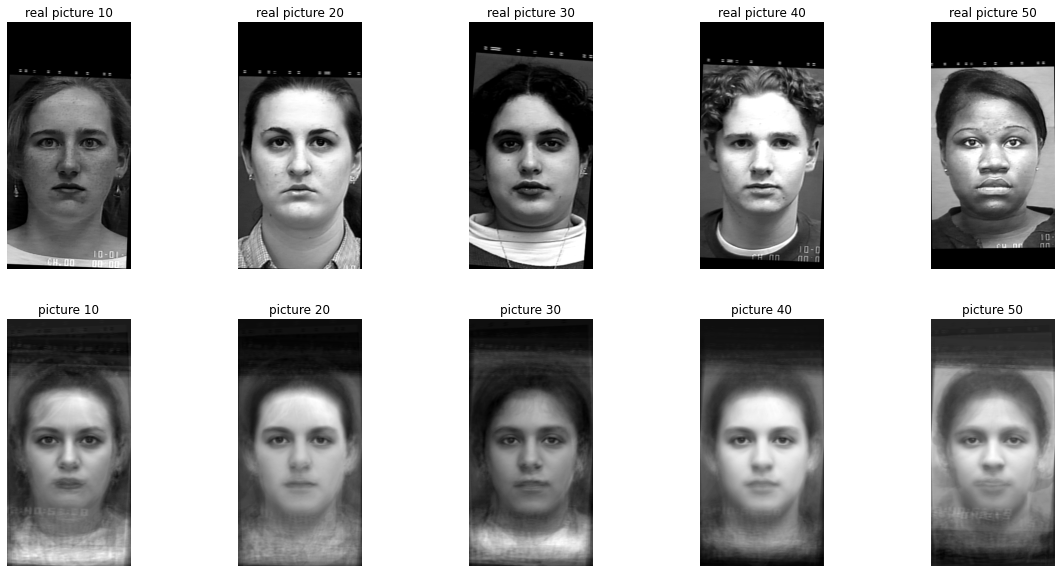

In [ ]:
num_components = 10
pca = PCA(n_components = num_components)
pca.fit(train_dataset)

X = pca.transform(test_dataset)   
Y = pca.inverse_transform(X)

plt.figure(figsize=(20,10))   
for i in range(9,59,10):

  plt.subplot(2, 5, int(i/10)+1)
  plt.title('real picture '+str(1+i))
  real_im = (test_dataset[i]).reshape(N1,N2)
  real_im = 255*((real_im - np.min(real_im)) / (np.max(real_im) - np.min(real_im)))
  plt.imshow(real_im, cmap='gray')
  plt.axis('off')
  
  #Y[i] = Y[i] + mean
  im = Y[i].reshape(N1,N2) 
  plt.subplot(2, 5, int(i/10)+6)
  plt.title('picture '+str(1+i))
  plt.imshow(im, cmap='gray')
  plt.axis('off')

## **Part 3**
## **3-1**

In [32]:
src = '/content/gdrive/MyDrive/MLVLab/Lab1/Cohn-Kanade/neutral'

data = dict()

for file in os.listdir(src):
  if file[-3:] in {'jpg', 'png'}:
    key = file[1:4]
    if key not in data.keys():
      data[key] = []
    im = io.imread(os.path.join(src,file), as_gray = True)
    N1 = im.shape[0]
    N2 = im.shape[1]
    im_row = np.reshape(im, N1*N2)
    data[key].append(im_row)

train_data_key: list = list(data.keys())
test_data_key = train_data_key[70:]
train_data_key = train_data_key[:70]


N_train_dataset = []

for key in train_data_key:
  for item in data[key]:
    N_train_dataset.append(item)

N_test_dataset = []

for key in test_data_key:
  for item in data[key]:
    N_test_dataset.append(item)


In [38]:
N_train_dataset = np.array(N_train_dataset)
N_test_dataset = np.array(N_test_dataset)
print(np.shape(N_train_dataset))
print(np.shape(N_test_dataset))

(136, 180000)
(54, 180000)


In [26]:
src = '/content/gdrive/MyDrive/MLVLab/Lab1/Cohn-Kanade/surprise'

data = dict()

for file in os.listdir(src):
  if file[-3:] in {'jpg', 'png'}:
    key = file[1:4]
    if key not in data.keys():
      data[key] = []
    im = io.imread(os.path.join(src,file), as_gray = True)
    N1 = im.shape[0]
    N2 = im.shape[1]
    im_row = np.reshape(im, N1*N2)
    data[key].append(im_row)

train_data_key: list = list(data.keys())
test_data_key = train_data_key[70:]
train_data_key = train_data_key[:70]


S_train_dataset = []

for key in train_data_key:
  for item in data[key]:
    S_train_dataset.append(item)

S_test_dataset = []

for key in test_data_key:
  for item in data[key]:
    S_test_dataset.append(item)


In [39]:
S_train_dataset = np.array(S_train_dataset)
S_test_dataset = np.array(S_test_dataset)
print(np.shape(S_train_dataset))
print(np.shape(S_test_dataset))

(76, 180000)
(12, 180000)


In [28]:
src = '/content/gdrive/MyDrive/MLVLab/Lab1/Cohn-Kanade/happy'

data = dict()

for file in os.listdir(src):
  if file[-3:] in {'jpg', 'png'}:
    key = file[1:4]
    if key not in data.keys():
      data[key] = []
    im = io.imread(os.path.join(src,file), as_gray = True)
    N1 = im.shape[0]
    N2 = im.shape[1]
    im_row = np.reshape(im, N1*N2)
    data[key].append(im_row)

train_data_key: list = list(data.keys())
test_data_key = train_data_key[70:]
train_data_key = train_data_key[:70]


H_train_dataset = []

for key in train_data_key:
  for item in data[key]:
    H_train_dataset.append(item)

H_test_dataset = []

for key in test_data_key:
  for item in data[key]:
    H_test_dataset.append(item)


In [40]:
H_train_dataset = np.array(H_train_dataset)
H_test_dataset = np.array(H_test_dataset)
print(np.shape(H_train_dataset))
print(np.shape(H_test_dataset))

(73, 180000)
(12, 180000)


In [30]:
src = '/content/gdrive/MyDrive/MLVLab/Lab1/Cohn-Kanade/disgust'

data = dict()

for file in os.listdir(src):
  if file[-3:] in {'jpg', 'png'}:
    key = file[1:4]
    if key not in data.keys():
      data[key] = []
    im = io.imread(os.path.join(src,file), as_gray = True)
    N1 = im.shape[0]
    N2 = im.shape[1]
    im_row = np.reshape(im, N1*N2)
    data[key].append(im_row)

train_data_key: list = list(data.keys())
test_data_key = train_data_key[70:]
train_data_key = train_data_key[:70]


D_train_dataset = []

for key in train_data_key:
  for item in data[key]:
    D_train_dataset.append(item)

D_test_dataset = []

for key in test_data_key:
  for item in data[key]:
    D_test_dataset.append(item)


In [41]:
D_train_dataset = np.array(D_train_dataset)
D_test_dataset = np.array(D_test_dataset)
print(np.shape(D_train_dataset))
print(np.shape(D_test_dataset))

(47, 180000)
(0,)


In [36]:
folder_dir = '/content/gdrive/MyDrive/MLVLab/Lab1/Masks'
masks_img = []
for file in os.listdir(folder_dir):
    img=io.imread(folder_dir+'/'+file,as_gray=True)
    N1=img.shape[0]
    N2=img.shape[1]
    img=img.reshape(img.shape[0]*img.shape[1])
    masks_img.append(img)      
masks_img=np.array(masks_img)

In [45]:
n = 20

N_train_dataset=N_train_dataset.reshape(N_train_dataset.shape[0],N_train_dataset.shape[1],1)
for i in range(N_train_dataset.shape[0]):
    N_train_dataset[i]=cv2.bitwise_and(N_train_dataset[i],N_train_dataset[i],mask = masks_img[0])
norm_img = N_train_dataset.reshape(N_train_dataset.shape[0],N_train_dataset.shape[1])

pca_norm = PCA(n_components=n)
pca_norm.fit(norm_img)


D_train_dataset=D_train_dataset.reshape(D_train_dataset.shape[0],D_train_dataset.shape[1],1)
for i in range(D_train_dataset.shape[0]):
    D_train_dataset[i]=cv2.bitwise_and(D_train_dataset[i],D_train_dataset[i],mask = masks_img[0])
disg_img = D_train_dataset.reshape(D_train_dataset.shape[0],D_train_dataset.shape[1])

pca_disg = PCA(n_components=n)
pca_disg.fit(disg_img)




H_train_dataset=H_train_dataset.reshape(H_train_dataset.shape[0],H_train_dataset.shape[1],1)
for i in range(H_train_dataset.shape[0]):
    H_train_dataset[i]=cv2.bitwise_and(H_train_dataset[i],H_train_dataset[i],mask = masks_img[0])
hap_img = H_train_dataset.reshape(H_train_dataset.shape[0],H_train_dataset.shape[1])

pca_hap = PCA(n_components=n)
pca_hap.fit(hap_img)




S_train_dataset=S_train_dataset.reshape(S_train_dataset.shape[0],S_train_dataset.shape[1],1)
for i in range(S_train_dataset.shape[0]):
    S_train_dataset[i]=cv2.bitwise_and(S_train_dataset[i],S_train_dataset[i],mask = masks_img[0])
sup_img=S_train_dataset.reshape(S_train_dataset.shape[0],S_train_dataset.shape[1])

pca_sup = PCA(n_components=n)
pca_sup.fit(sup_img)

PCA(n_components=20)

## **3-2**

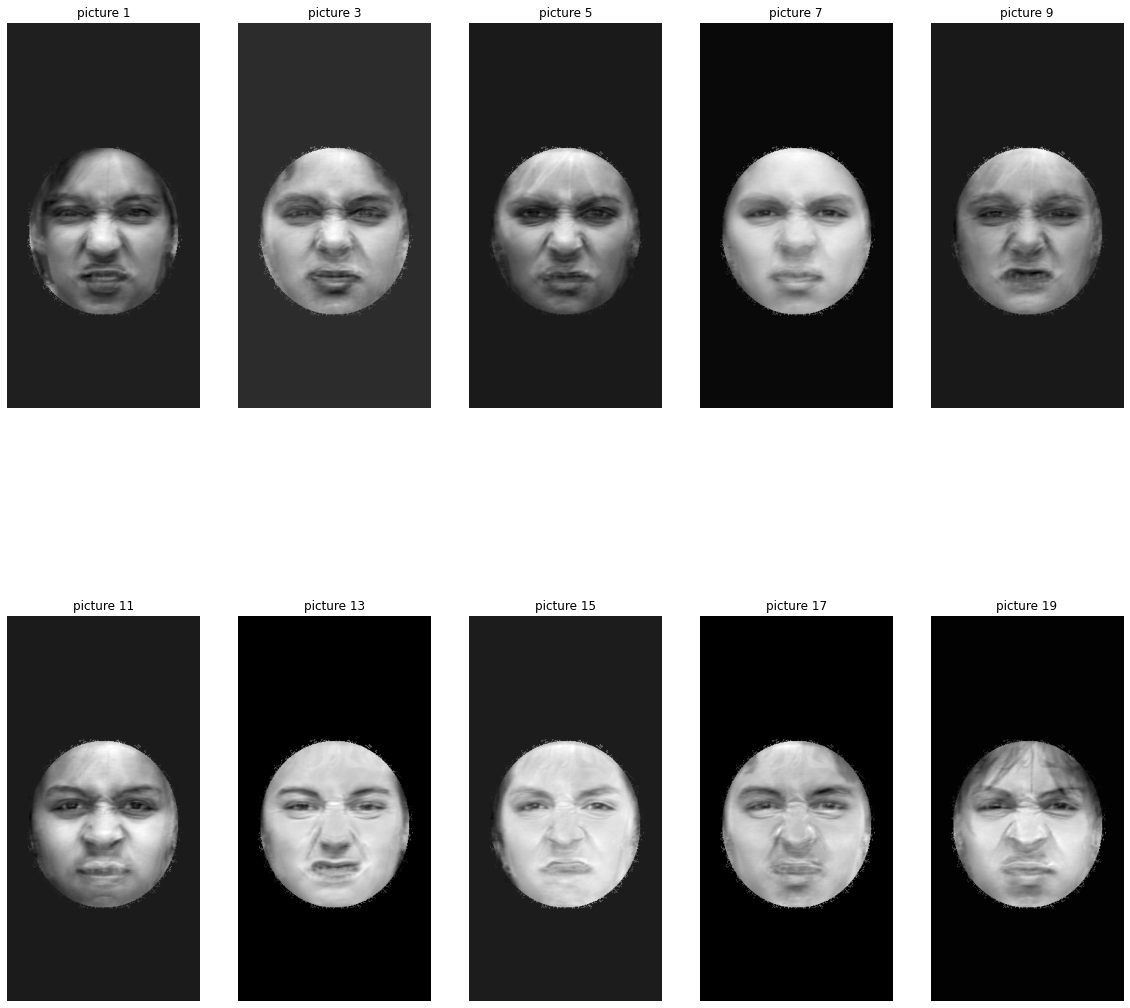

In [46]:
X=pca_disg.transform(norm_img)   
Y=pca_disg.inverse_transform(X)
plt.figure(figsize=(20,20))   
for i in range(0,20,2):
    img=Y[i].reshape(N1,N2)
    plt.subplot(2, 5, int(i/2)+1)
    plt.title('picture '+str(1+i))
    plt.imshow(img, cmap='gray')
    plt.axis('off')

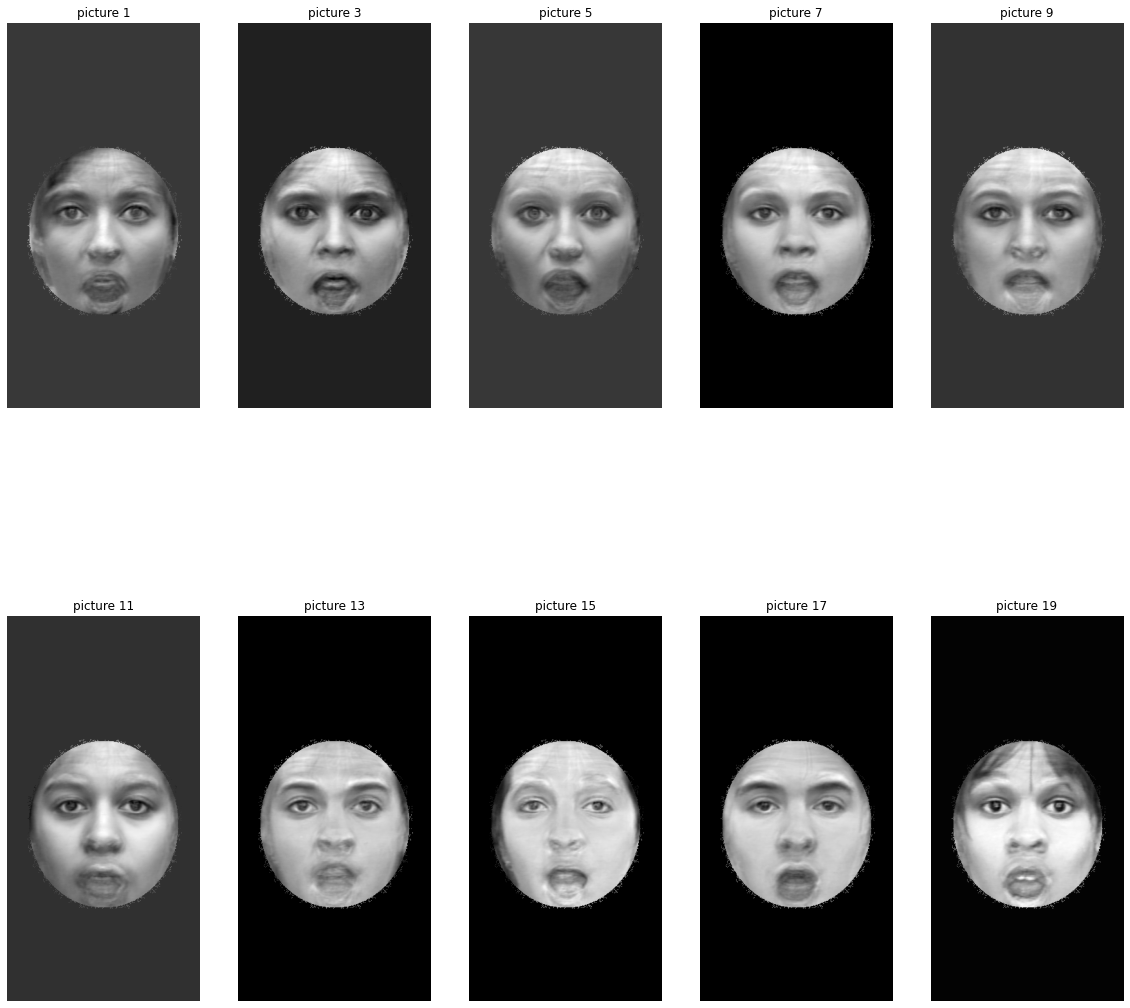

In [47]:
X=pca_sup.transform(norm_img)   
Y=pca_sup.inverse_transform(X)
plt.figure(figsize=(20,20))   
for i in range(0,20,2):
    img=Y[i].reshape(N1,N2)
    plt.subplot(2, 5, int(i/2)+1)
    plt.title('picture '+str(1+i))
    plt.imshow(img, cmap='gray')
    plt.axis('off')

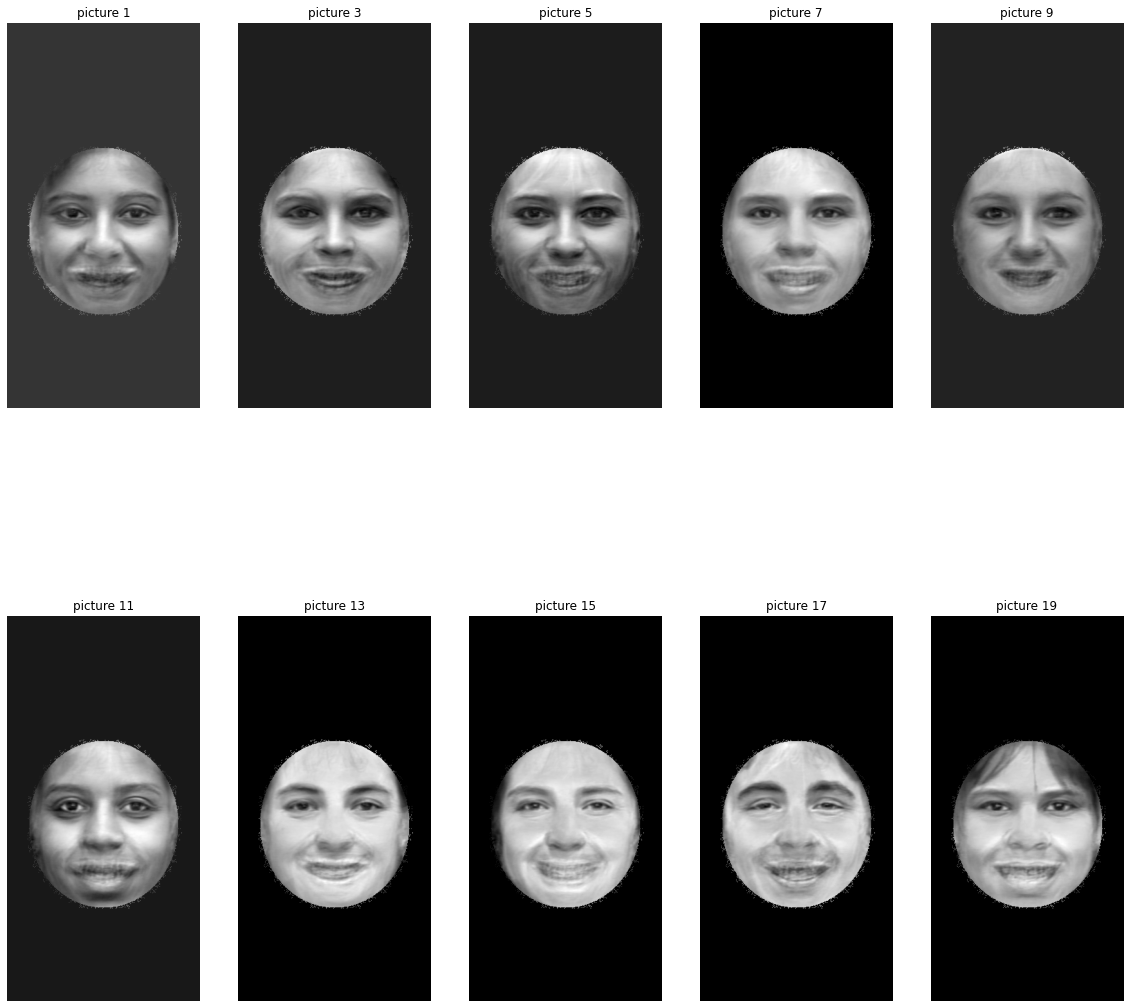

In [48]:
X=pca_hap.transform(norm_img)   
Y=pca_hap.inverse_transform(X)
plt.figure(figsize=(20,20))   
for i in range(0,20,2):
    img=Y[i].reshape(N1,N2)
    plt.subplot(2, 5, int(i/2)+1)
    plt.title('picture '+str(1+i))
    plt.imshow(img, cmap='gray')
    plt.axis('off')